In [352]:
print("Hello world")

Hello world


In [1]:
import pandas 


{'ANZ': {'20191231': (24.67, 24.75, 24.43, 24.63, 3259787)}}

In [4]:

from convertStockToJson import getDataFromFiles
from filesInPath import filesInPath

pathToFiles = "2019"

filenames = filesInPath(pathToFiles)

stockPrices = getDataFromFiles(pathToFiles, filenames, ['ANZ'])

In [ ]:
print(stockPrices['ANZ'])

In [355]:
VAS = stockPrices['VAS']
#pandas.read_json('data/VAS.json')



In [356]:
#open, high, low, close, volume
opens = []
highs = []
lows = []
closes = []
volumes = []
dates = []



for key in VAS:
    (open, high, low, close, volume) = VAS[key]
    opens.append(open)
    highs.append(high)
    lows.append(low)
    closes.append(close)
    volumes.append(volume)
    dates.append(key)

data = {'Date':dates, 'Open':opens, 'High':highs, 'Low':lows, 'Close':closes, 'Volume': volumes}

VASdf = pandas.DataFrame(data=data)

print(VASdf)


         Date   Open   High    Low  Close  Volume
0    20180102  78.10  78.10  76.60  77.04   31456
1    20180103  77.44  77.44  77.20  77.25   99978
2    20180104  77.75  77.75  77.26  77.43   32709
3    20180105  77.80  78.02  77.67  77.96   28714
4    20180108  78.27  78.27  78.03  78.05   43656
..        ...    ...    ...    ...    ...     ...
501  20191223  86.67  86.67  86.41  86.45   68119
502  20191224  86.44  86.52  86.25  86.43   45909
503  20191227  86.64  86.85  86.50  86.81   52244
504  20191230  86.86  86.92  86.31  86.88   64856
505  20191231  86.40  86.40  85.35  85.45  111457

[506 rows x 6 columns]


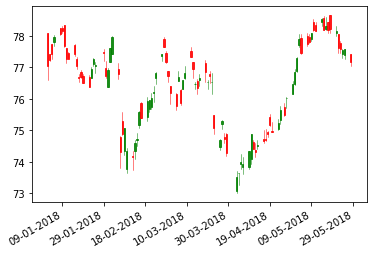

In [357]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates


VASdfcandle = VASdf.copy()
VASdfcandle = VASdfcandle.truncate(before=0, after=100)

VASdfcandle['Date'] = pandas.to_datetime(VASdfcandle['Date'], format="%Y%m%d")

VASdfcandle['Date'] = VASdfcandle['Date'].apply(mpl_dates.date2num)
VASdfcandle = VASdfcandle.astype(float)
fig, ax = plt.subplots()

date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

candlestick_ohlc(ax, VASdfcandle.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# plt.plot(VASdf['open'])
# plt.plot(VASdf['close'])
# plt.plot(VASdf['low'])
# plt.plot(VASdf['high'])

plt.show()

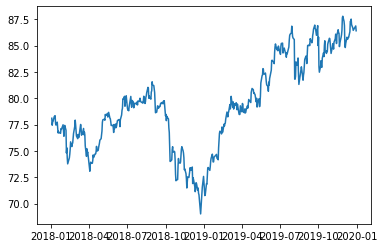

In [358]:
import numpy as np
import matplotlib.pyplot as plt

VASdfplot = VASdf.copy()
VASdfplot['Date'] = pandas.to_datetime(VASdfplot['Date'], format="%Y%m%d")

plt.plot(VASdfplot['Date'],VASdfplot['Open'])

plt.show()

In [359]:

VASmean30 = VASdf['Close'].rolling(50).mean()
VASmean50 = VASdf['Close'].rolling(200).mean()

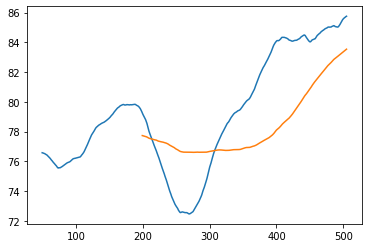

In [360]:
plt.plot(VASmean30)
plt.plot(VASmean50)
#plt.plot(VASdfplot['Close'])

plt.show()

In [361]:
import math


def linesCross(quicks : pandas.DataFrame, slows : pandas.DataFrame, actuals : pandas.DataFrame):
    signal = np.zeros(len(quicks))
    signalDiscreteBuy = np.empty(len(quicks))
    signalDiscreteBuy[:] = np.NaN
    signalDiscreteSell = np.empty(len(quicks))
    signalDiscreteSell[:] = np.NaN
    print(signalDiscreteBuy)
    print(quicks[0])
    
    start = 0
    while math.isnan(quicks[start]) or math.isnan(slows[start]):
        start = start + 1

    start = start + 1
    isAbove = quicks[start] > slows[start]
    print(isAbove)

    for i in range(start, len(slows)):
        quick = quicks[i]
        slow = slows[i]
        actual = actuals[i]

        # print(str(quick) + " " + str(slow) + " " + str(isAbove))
        if(isAbove and quick < slow):
            #sell signal     
            signal[i] = -1
            signalDiscreteSell[i] = actual
            signalDiscreteBuy[i] = np.nan
            isAbove = False
        elif(not isAbove and quick > slow):
            #buy signal
            signal[i] = 1
            signalDiscreteBuy[i] = actual
            signalDiscreteSell[i] = math.nan
            isAbove = True
        else:
             signalDiscreteBuy[i] = math.nan
             signalDiscreteSell[i] = math.nan



    return (signal, signalDiscreteBuy, signalDiscreteSell)


#(signals, signalBuy, signalSell) = linesCross(VASdf['Close'], VASmean30, VASdf['Close'])
(signals, signalBuy, signalSell) = linesCross(VASmean30, VASmean50, VASdf['Close'])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

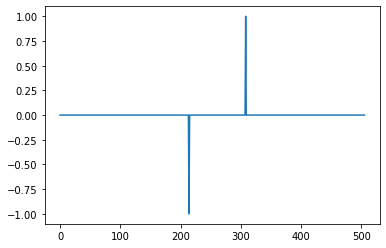

In [362]:
plt.plot(signals)
#plt.plot(VASdfplot['Close'])

plt.show()

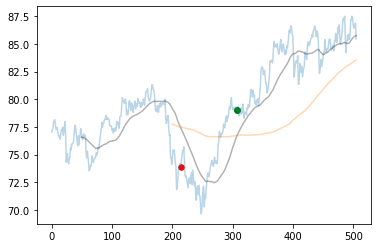

In [363]:

plt.plot(VASdfplot['Close'], alpha=0.3)
plt.plot(VASmean30, alpha=0.3, c='black')
plt.plot(VASmean50, alpha=0.3)
plt.scatter(np.arange(len(signalBuy)), signalBuy, c='green')
plt.scatter(np.arange(len(signalSell)), signalSell, c='red', s=30)

plt.show()

In [364]:
#buy and sell simple

principle = 1000
buyingPower = principle
stocks = 0
investedAmount = 0
onlySellWhenHigher = False

equity = np.zeros(len(signals))

i = 0
for (signal, stockPrice) in zip(signals, VASdf['Close']):
    stockPosition = stocks*stockPrice
    stockAmount = int(buyingPower/stockPrice)
    cost = stockAmount * stockPrice 
    if(signal > 0):
        #should buy
        
        if(stockAmount > 0):
            print(str(buyingPower) + " " + str(cost))
            #buy
            investedAmount += cost
            buyingPower -= cost
            stocks += stockAmount
            print("Buy " + str(i) + " Stocks: " + str(stocks) + ", StockPosition: " + str(stocks*stockPrice) + ", Money: " + str(buyingPower))
    elif(signal < 0):
        #should sell
        if(stocks > 0 and investedAmount < stockPosition or not onlySellWhenHigher):
            print("Sell " + str(i) + " Stocks: " + str(stocks) + ", StockPosition: " + str(stockPosition) + ", Money: " + str(buyingPower) + " investedAmount " + str(investedAmount) )
            investedAmount -= stockPosition
            buyingPower += stockPosition
            stocks = 0
            print("Money:" + str(buyingPower))
         
    equity[i] = buyingPower + stocks*stockPrice
    i += 1
    

buyingPower += stockPosition
stocks = 0

print(buyingPower)

print((buyingPower/principle)-1)


Sell 214 Stocks: 0, StockPosition: 0.0, Money: 1000 investedAmount 0
Money:1000.0
1000.0 948.1200000000001
Buy 308 Stocks: 12, StockPosition: 948.1200000000001, Money: 51.87999999999988
1077.28
0.07728000000000002


[]

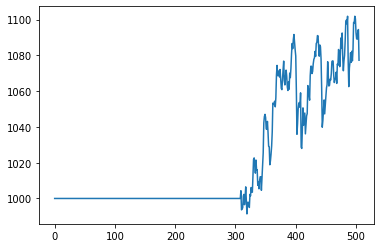

In [365]:
plt.plot(equity)
plt.plot()